In [1]:
import PyCC
import numpy as np
import matplotlib.pyplot as plt
def plot_pretty(dpi=200,fontsize=10):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 3]

plot_pretty()

In [13]:
plummer = PyCC.Distributions.Plummer(10000,1,1,1)

nsteps = 10

outf8,stats = PyCC.evaluate(plummer,steps=nsteps,dt=1/64,precision="f4",accelerate=True)
print("f8",stats)

f8 {'eval_time': 0.1856921660000097}


In [14]:
ke = []
phis = []

for step in range(nsteps+1):
    vels = outf8[outf8["step"] == step].loc[:,["vx","vy","vz"]].to_numpy()
    speeds = np.linalg.norm(vels,axis=1)
    energies = (1/2) * plummer.loc[:,"mass"].to_numpy()[0] * (speeds**2)
    energy = np.sum(energies)
    ke.append(energy)
    phis.append(np.sum(outf8[outf8["step"] == step].loc[:,"phi"].to_numpy())/2)

ke = np.array(ke)
phis = np.array(phis)
tot = ke+phis

In [15]:
print(phis)

[-0.29343808 -0.29341972 -0.29341769 -0.29341602 -0.2934233  -0.29342389
 -0.29342526 -0.29342109 -0.29340923 -0.29340911 -0.29340109]


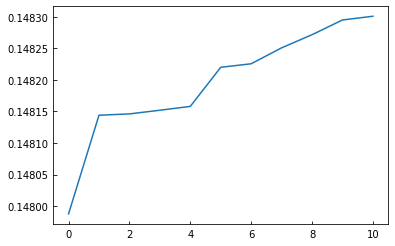

In [16]:
plt.plot(ke)
plt.show()

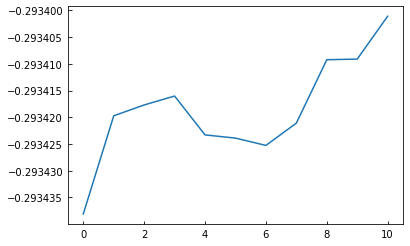

In [17]:
plt.plot(phis)
plt.show()

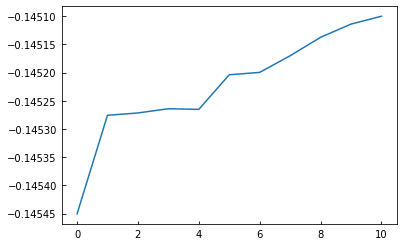

In [18]:
plt.plot(tot)
plt.show()